In [ ]:
#Installation Process
pip install pystan
pip install fbprophet
conda install -c conda-forge fbprophet
conda install gcc

"""
There is a recent bug where Easter cannot be imported in the fbphophet package. You must navigate to hdays.py and 
replacel line 16 with the below: 

from holidays import WEEKEND, HolidayBase
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd
"""



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
from fbprophet.plot import add_changepoints_to_plot
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [2]:
#Correcting OS Director for file import
os.getcwd()
os.chdir('/Users/Jeffrey.Lu@ibm.com/Desktop')

In [9]:
#import
df = pd.read_csv("Pricing_Forecast_File .csv")

In [10]:
#Prophet only works with ds and y columns
df = df[['date','eCPM']]
df.columns = ['ds','y']

In [12]:
df.head()

,ds,y
0,10/15/18,$12.23
1,10/16/18,$10.84
2,10/17/18,$11.14
3,10/18/18,$12.35
4,10/19/18,$13.56


In [14]:
#Converting string to float for eCPM column
df['y'] = df.y.str.replace('$',"")
df['y'] = df.y.astype('float')

In [15]:
#Converting date data to datetime object
df['ds'] = pd.to_datetime(df['ds'])

In [16]:
#Deleting future dates (null eCPMS)
df1 = df.loc[df.y.notnull()]

In [17]:
#Creaing Train/Test Split
train = df1.iloc[:355]
test = df1.iloc[355:]

In [18]:
#Constructing Model
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [19]:
#Future Predictions Placeholder
future = m.make_future_dataframe(periods = 134)

In [20]:
forecast = m.predict(future)

In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-15,15.351808,11.304383,18.700494,15.351808,15.351808,-0.536812,-0.536812,-0.536812,-0.536812,-0.536812,-0.536812,0.0,0.0,0.0,14.814995
1,2018-10-16,15.340564,11.138617,18.032067,15.340564,15.340564,-0.673007,-0.673007,-0.673007,-0.673007,-0.673007,-0.673007,0.0,0.0,0.0,14.667557
2,2018-10-17,15.329321,11.471103,18.816907,15.329321,15.329321,-0.231949,-0.231949,-0.231949,-0.231949,-0.231949,-0.231949,0.0,0.0,0.0,15.097372
3,2018-10-18,15.318078,11.756804,18.967896,15.318078,15.318078,0.157864,0.157864,0.157864,0.157864,0.157864,0.157864,0.0,0.0,0.0,15.475941
4,2018-10-19,15.306835,11.443585,18.598672,15.306835,15.306835,-0.219662,-0.219662,-0.219662,-0.219662,-0.219662,-0.219662,0.0,0.0,0.0,15.087173


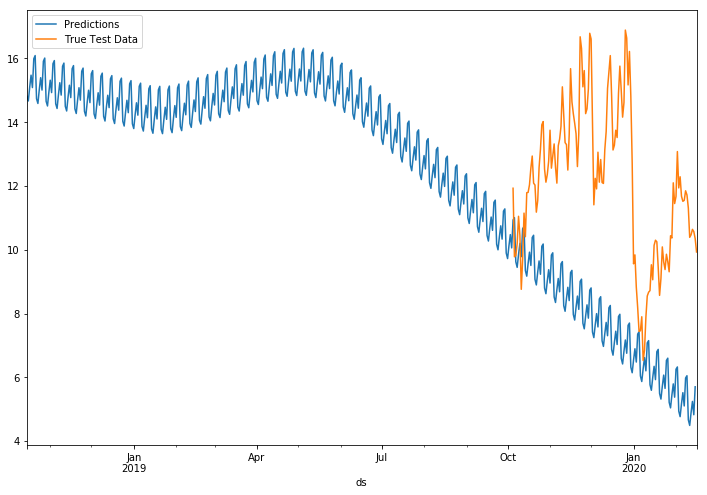

In [22]:
#Plotting test set actual data vs predicted data
pd.plotting.register_matplotlib_converters()
ax = forecast.plot(x='ds',y='yhat',label = 'Predictions', legend = 'True', figsize = (12,8))
test.plot(x='ds',y='y',label='True Test Data', legend = True, ax = ax, )

In [29]:
#Prediction Evaluation
predictions = forecast.iloc[-135:]['yhat']
rmse(predictions, test['y'])

5.100836986793263

In [28]:
df.y.mean()

13.598673469387768

In [30]:
rmse(predictions, test['y'])/df.y.mean()

0.37509812984890434

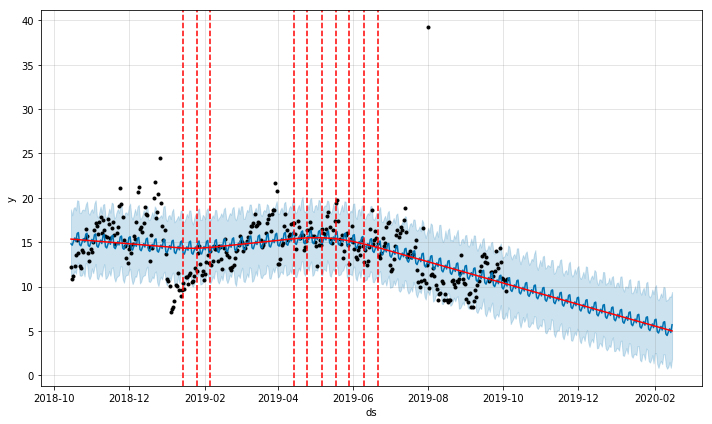

In [26]:
#Additional Trend Analysis: Vertical lines represent where trends start to form
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)